**Демо-экзамен по курсу "Машинное обучение"**

Выполнил: Тарасов С.В. Б22-703

Филиал: НИЯУ МИФИ

 *Вставьте ниже скриншот из личного кабинета Иннополиса с результатами прохождения итогового асессмента (https://auth.unionepro.ru/login?redirect=https%3A%2F%2Fassessment.unionepro.ru%2F)*

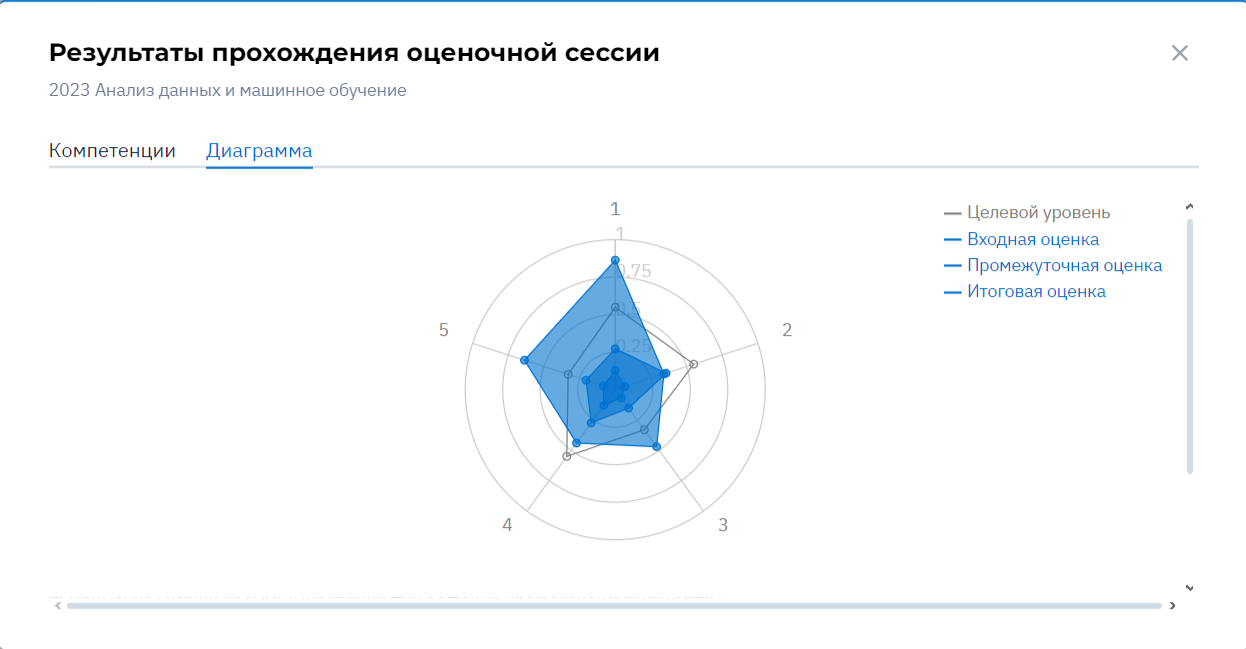

---
# 1. Исходные данные

### 1.1 Загрузка библиотек и данных


*Загрузить данные в соответствии с вариантом задания*

In [172]:
# Load data

from sklearn.datasets import load_digits
data = load_digits()


In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

print(data.DESCR)

df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.head())
print(df.columns)
df.info()

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

### 1.2 Описание исходных данных


*Привести описание исходных данных, описание и типы признаков (вещественные, целочисленные, категориальные и т.д.), объём выборки, особенности данных. Сформулировать решаемую задачу, определить тип задачи (регрессия / классификация), указать входные и выходные переменные.*

Описание данных:

Название набора данных:
Optical Recognition of Handwritten Digits Dataset

Объем выборки: 1797 записей

Число признаков: 64 признака

Тип задачи: Многоклассовая классификация

Классы: Цифры от 0 до 9 (всего 10 классов)

Признаки: Каждый пример представляет собой изображение цифры размером 8x8, где каждый пиксель представлен целым числом в диапазоне от 0 до 16, указывающим на уровень интенсивности (от черного до белого). То есть, изображение преобразовано в 64 числовых признака, каждая колонка соответствует одному пикселю изображения.

Типы признаков:
Все признаки — вещественные (целочисленные) значения от 0 до 16. Признаки не дискретные и имеют диапазон возможных значений, которые обозначают уровень интенсивности серого цвета в каждом пикселе.

Особенности данных:
Число признаков фиксировано (64 пикселя на изображение).
Все данные числовые — это уровень интенсивности пикселя, что делает их пригодными для использования в моделях машинного обучения.

Отсутствие пропущенных данных.

Многоклассовая задача: Каждая запись принадлежит одному из 10 классов, которые представляют цифры от 0 до 9.

Нормализованная форма данных: Препроцессинг был выполнен с помощью деления 32x32 изображений на блоки 4x4 пикселя, что привело к уменьшению размерности до 8x8 и придало устойчивость к небольшим искажениям изображения.

Цель задачи — это распознавание рукописных цифр на основе изображений, представленных в виде матрицы интенсивностей пикселей (8x8).

Тип задачи: Многоклассовая классификация.

Входные переменные: 64 вещественных числовых признака, где каждое значение представляет собой интенсивность соответствующего пикселя изображения.

Выходная переменная: Класс цифры (целочисленная переменная, представляющая одну из цифр от 0 до 9).

Таким образом, цель модели — предсказать, какая цифра изображена на картинке, исходя из входных признаков (пикселей). Для этого можно применять различные алгоритмы классификации, такие как логистическая регрессия.

### 1.3 Выборочные характеристики

*Рассчитать основные выборочные характеристики (среднее, дисперсию, среднеквадратическое отклонение, медиану и т.д.), привести объемы выборок в каждом классе (для задач классификации)*

In [175]:
# Calculation of the main statistical characteristics
statistics = df.describe().T

# Adding mids and dispersions to the table
statistics['median'] = df.median()
statistics['variance'] = df.var()

print(statistics)

            count       mean       std  min   25%   50%   75%   max  median  \
pixel_0_0  1797.0   0.000000  0.000000  0.0   0.0   0.0   0.0   0.0     0.0   
pixel_0_1  1797.0   0.303840  0.907192  0.0   0.0   0.0   0.0   8.0     0.0   
pixel_0_2  1797.0   5.204786  4.754826  0.0   1.0   4.0   9.0  16.0     4.0   
pixel_0_3  1797.0  11.835838  4.248842  0.0  10.0  13.0  15.0  16.0    13.0   
pixel_0_4  1797.0  11.848080  4.287388  0.0  10.0  13.0  15.0  16.0    13.0   
...           ...        ...       ...  ...   ...   ...   ...   ...     ...   
pixel_7_3  1797.0  12.089037  4.374694  0.0  11.0  13.0  16.0  16.0    13.0   
pixel_7_4  1797.0  11.809126  4.933947  0.0  10.0  14.0  16.0  16.0    14.0   
pixel_7_5  1797.0   6.764051  5.900623  0.0   0.0   6.0  12.0  16.0     6.0   
pixel_7_6  1797.0   2.067891  4.090548  0.0   0.0   0.0   2.0  16.0     0.0   
pixel_7_7  1797.0   0.364496  1.860122  0.0   0.0   0.0   0.0  16.0     0.0   

            variance  
pixel_0_0   0.000000  
pixel

### 1.4 Исследование распределений признаков и откликов


*Построить гистограммы распределения и диаграммы Box-and-Whisker (для отдельных признаков при большом их числе), сделать выводы о характере распределений признаков (для задач классификации - в классах), наличии выбросов и т.п.*

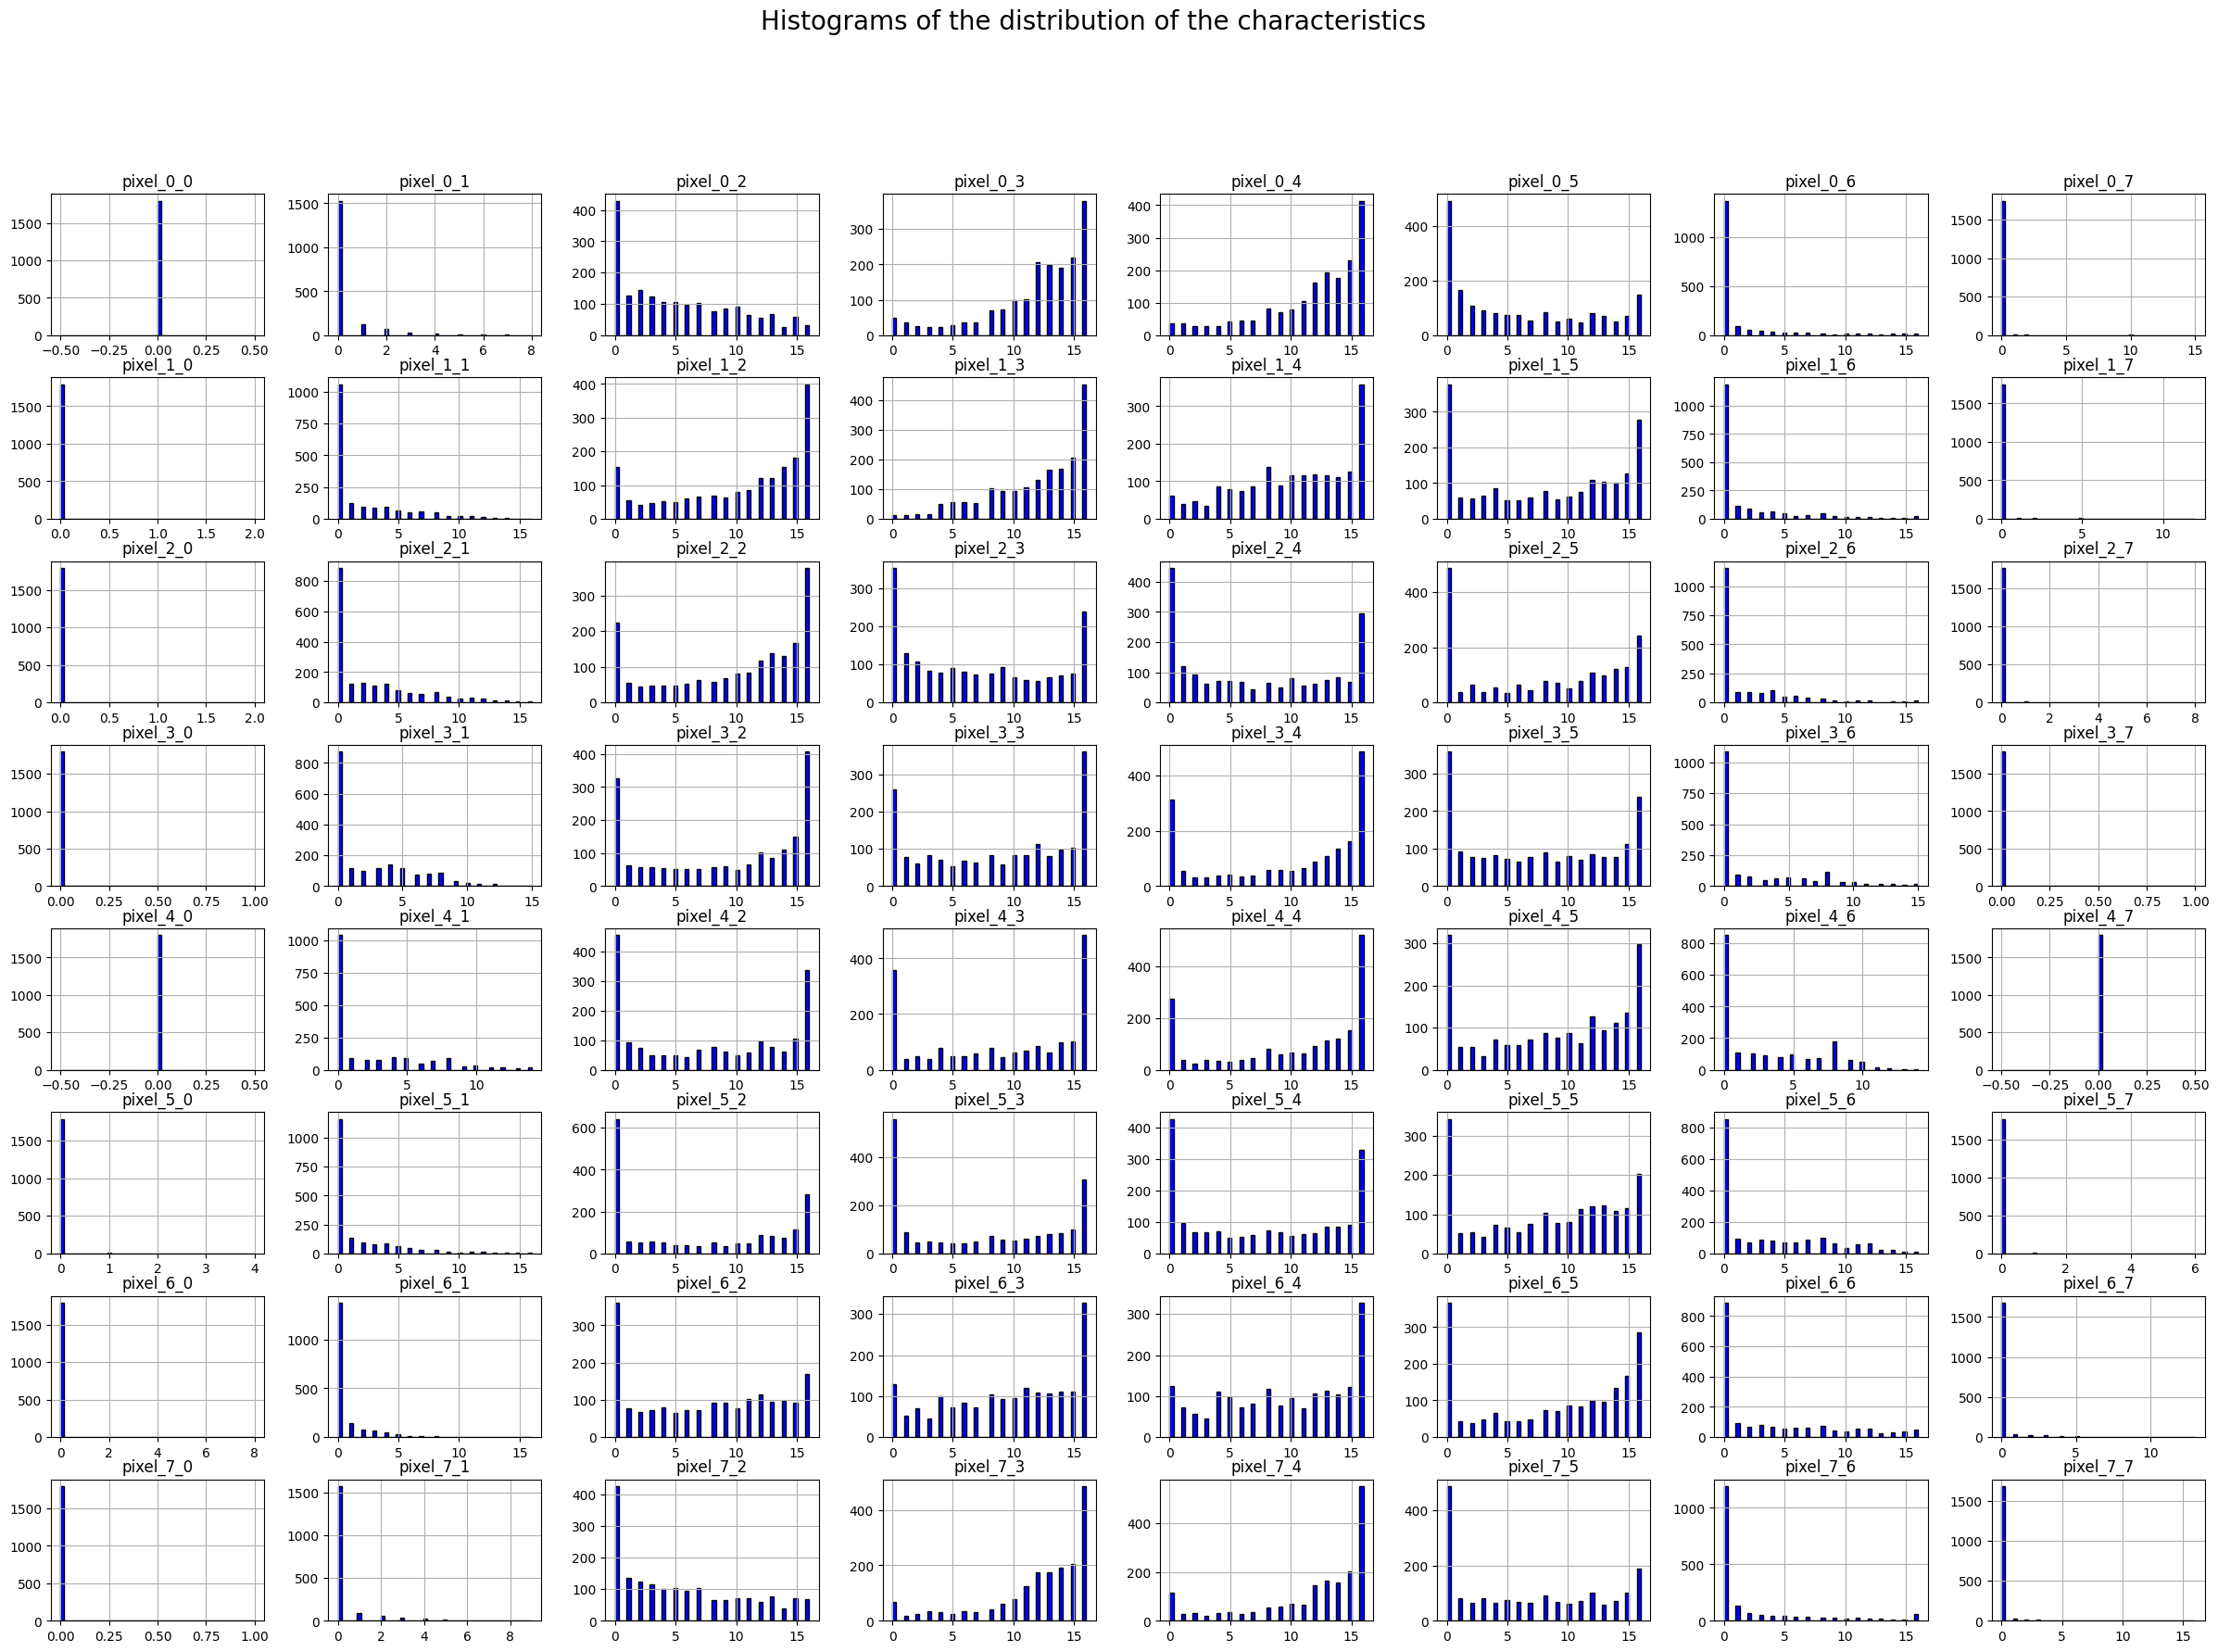

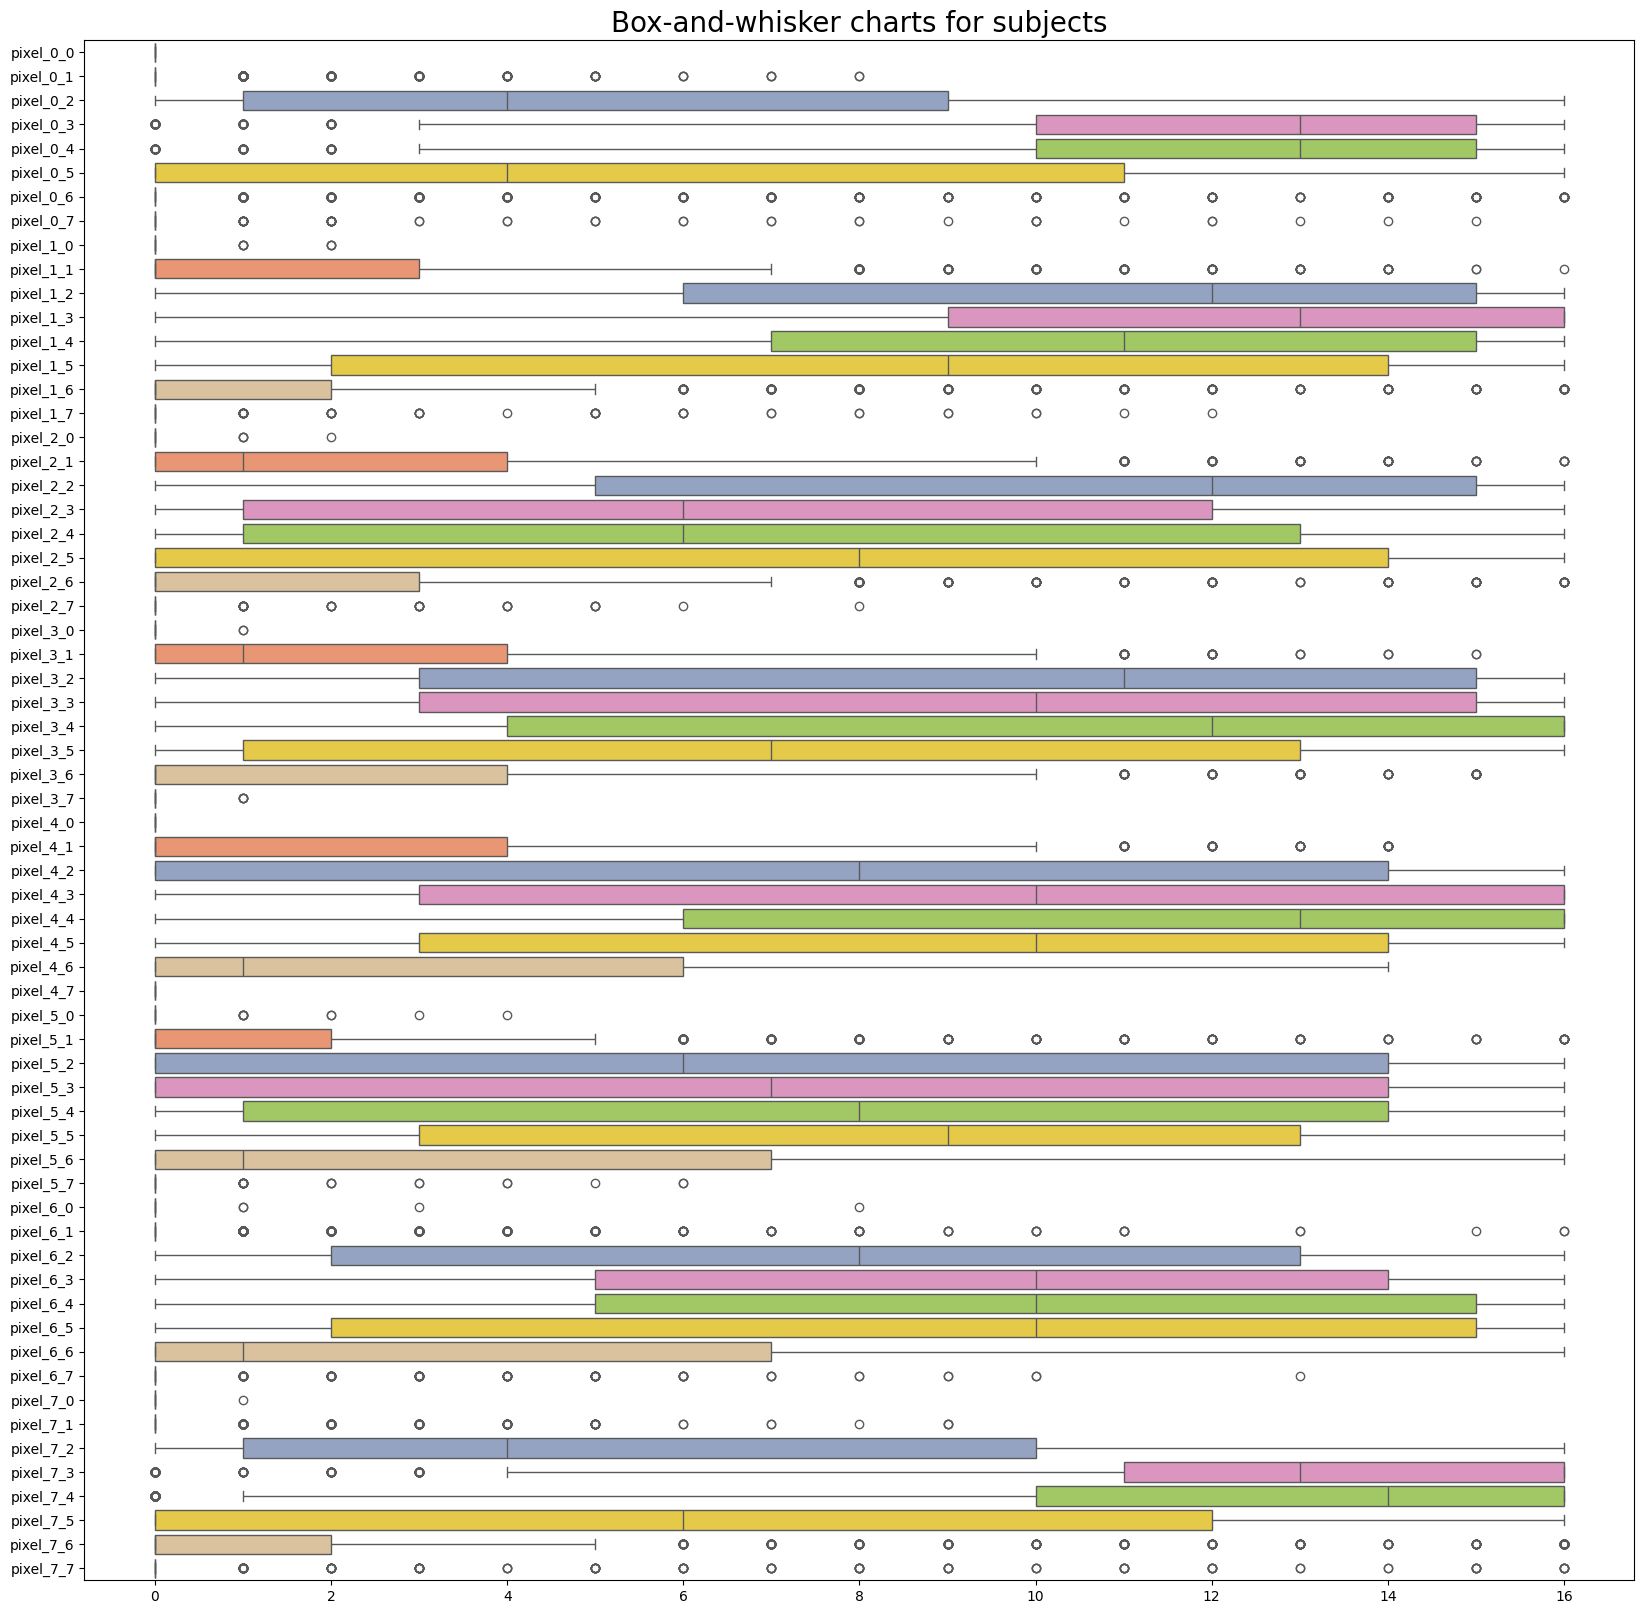

In [177]:
# Histograms
df.hist(figsize=(30, 20), bins=50, color='blue', edgecolor='black')
plt.suptitle('Histograms of the distribution of the characteristics', fontsize=20)
plt.show()

# Box-and-Whisker
plt.figure(figsize=(20, 20))
sns.boxplot(data=df, orient='h', palette="Set2")
plt.title('Box-and-whisker charts for subjects', fontsize=20)
plt.show()

 **Гистограмма**
Большинство признаков имеют ассимитричное распределение, в пике в значениях близких к нулю. Это означает, что большинство пикселей почти черные, или они находятся на углах(это например пиксели 0_0, 2_0,4_0, 2_7 и др.)

Для некоторых признаков(таких, как pixel_5_4) наблюдается несколько пиков, что означает, что данные области активируются чаще, чем остальные


 **Диаграмма Box-and-Whisker**
Большой разбор данных. Например, такие пиксели как 5_0 и 2_2 имеют широкий разрос, что указывает на большую изменчивость этих данных

Выбросы присутствуют у многих данных(pixel_1_7, pixel_0_6 и др.), что говорит о редких, но возможные высокие или низкие значения в данных

У некоторых пикселей усы длиннее, что говорит о большем разбросе данных вне межквартильного размаха.

Общие выводы:
Большое количество нулевых значений
Большое количество выбросов
Ассиметричное распределение


### 1.5 Корреляционный анализ данных


*Визуализировать диаграммы рассеяния и корреляционную матрицу признаков, сделать выводы*

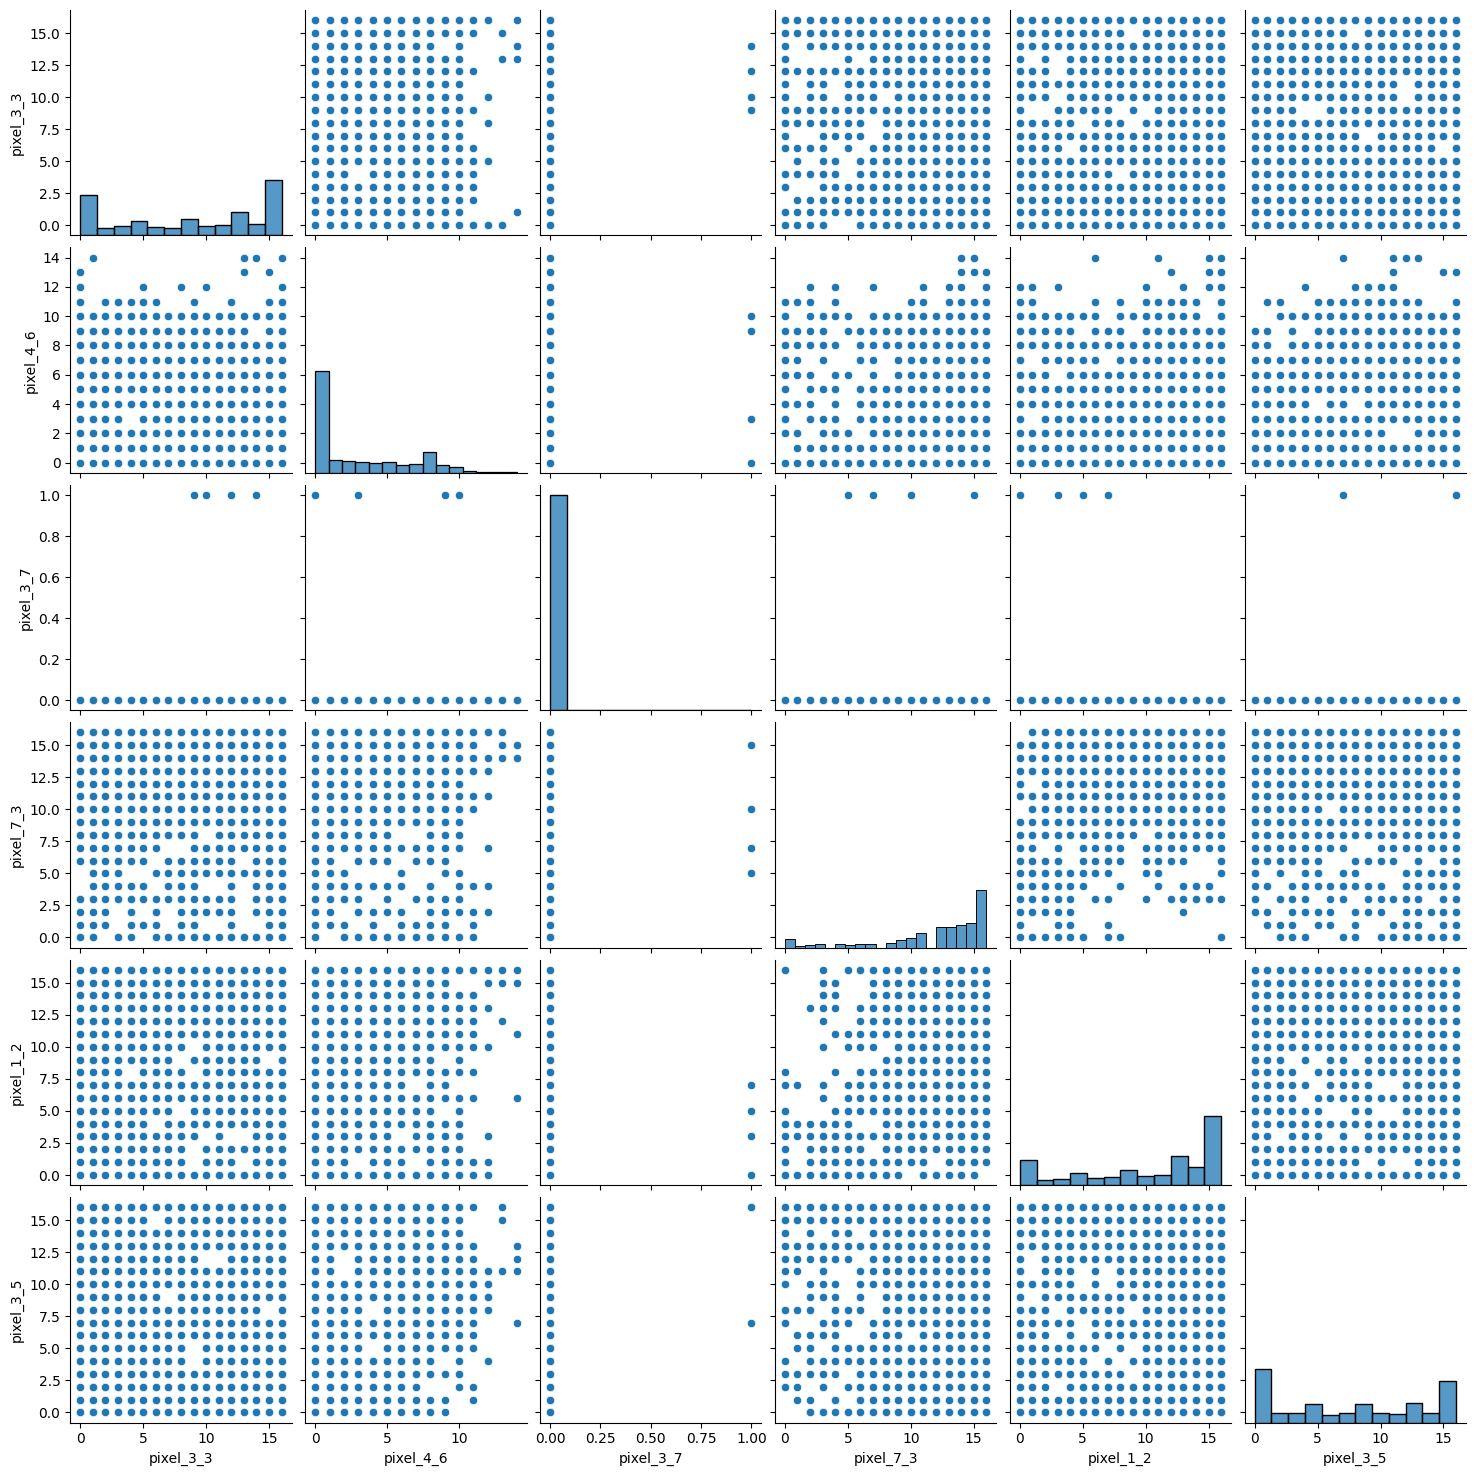

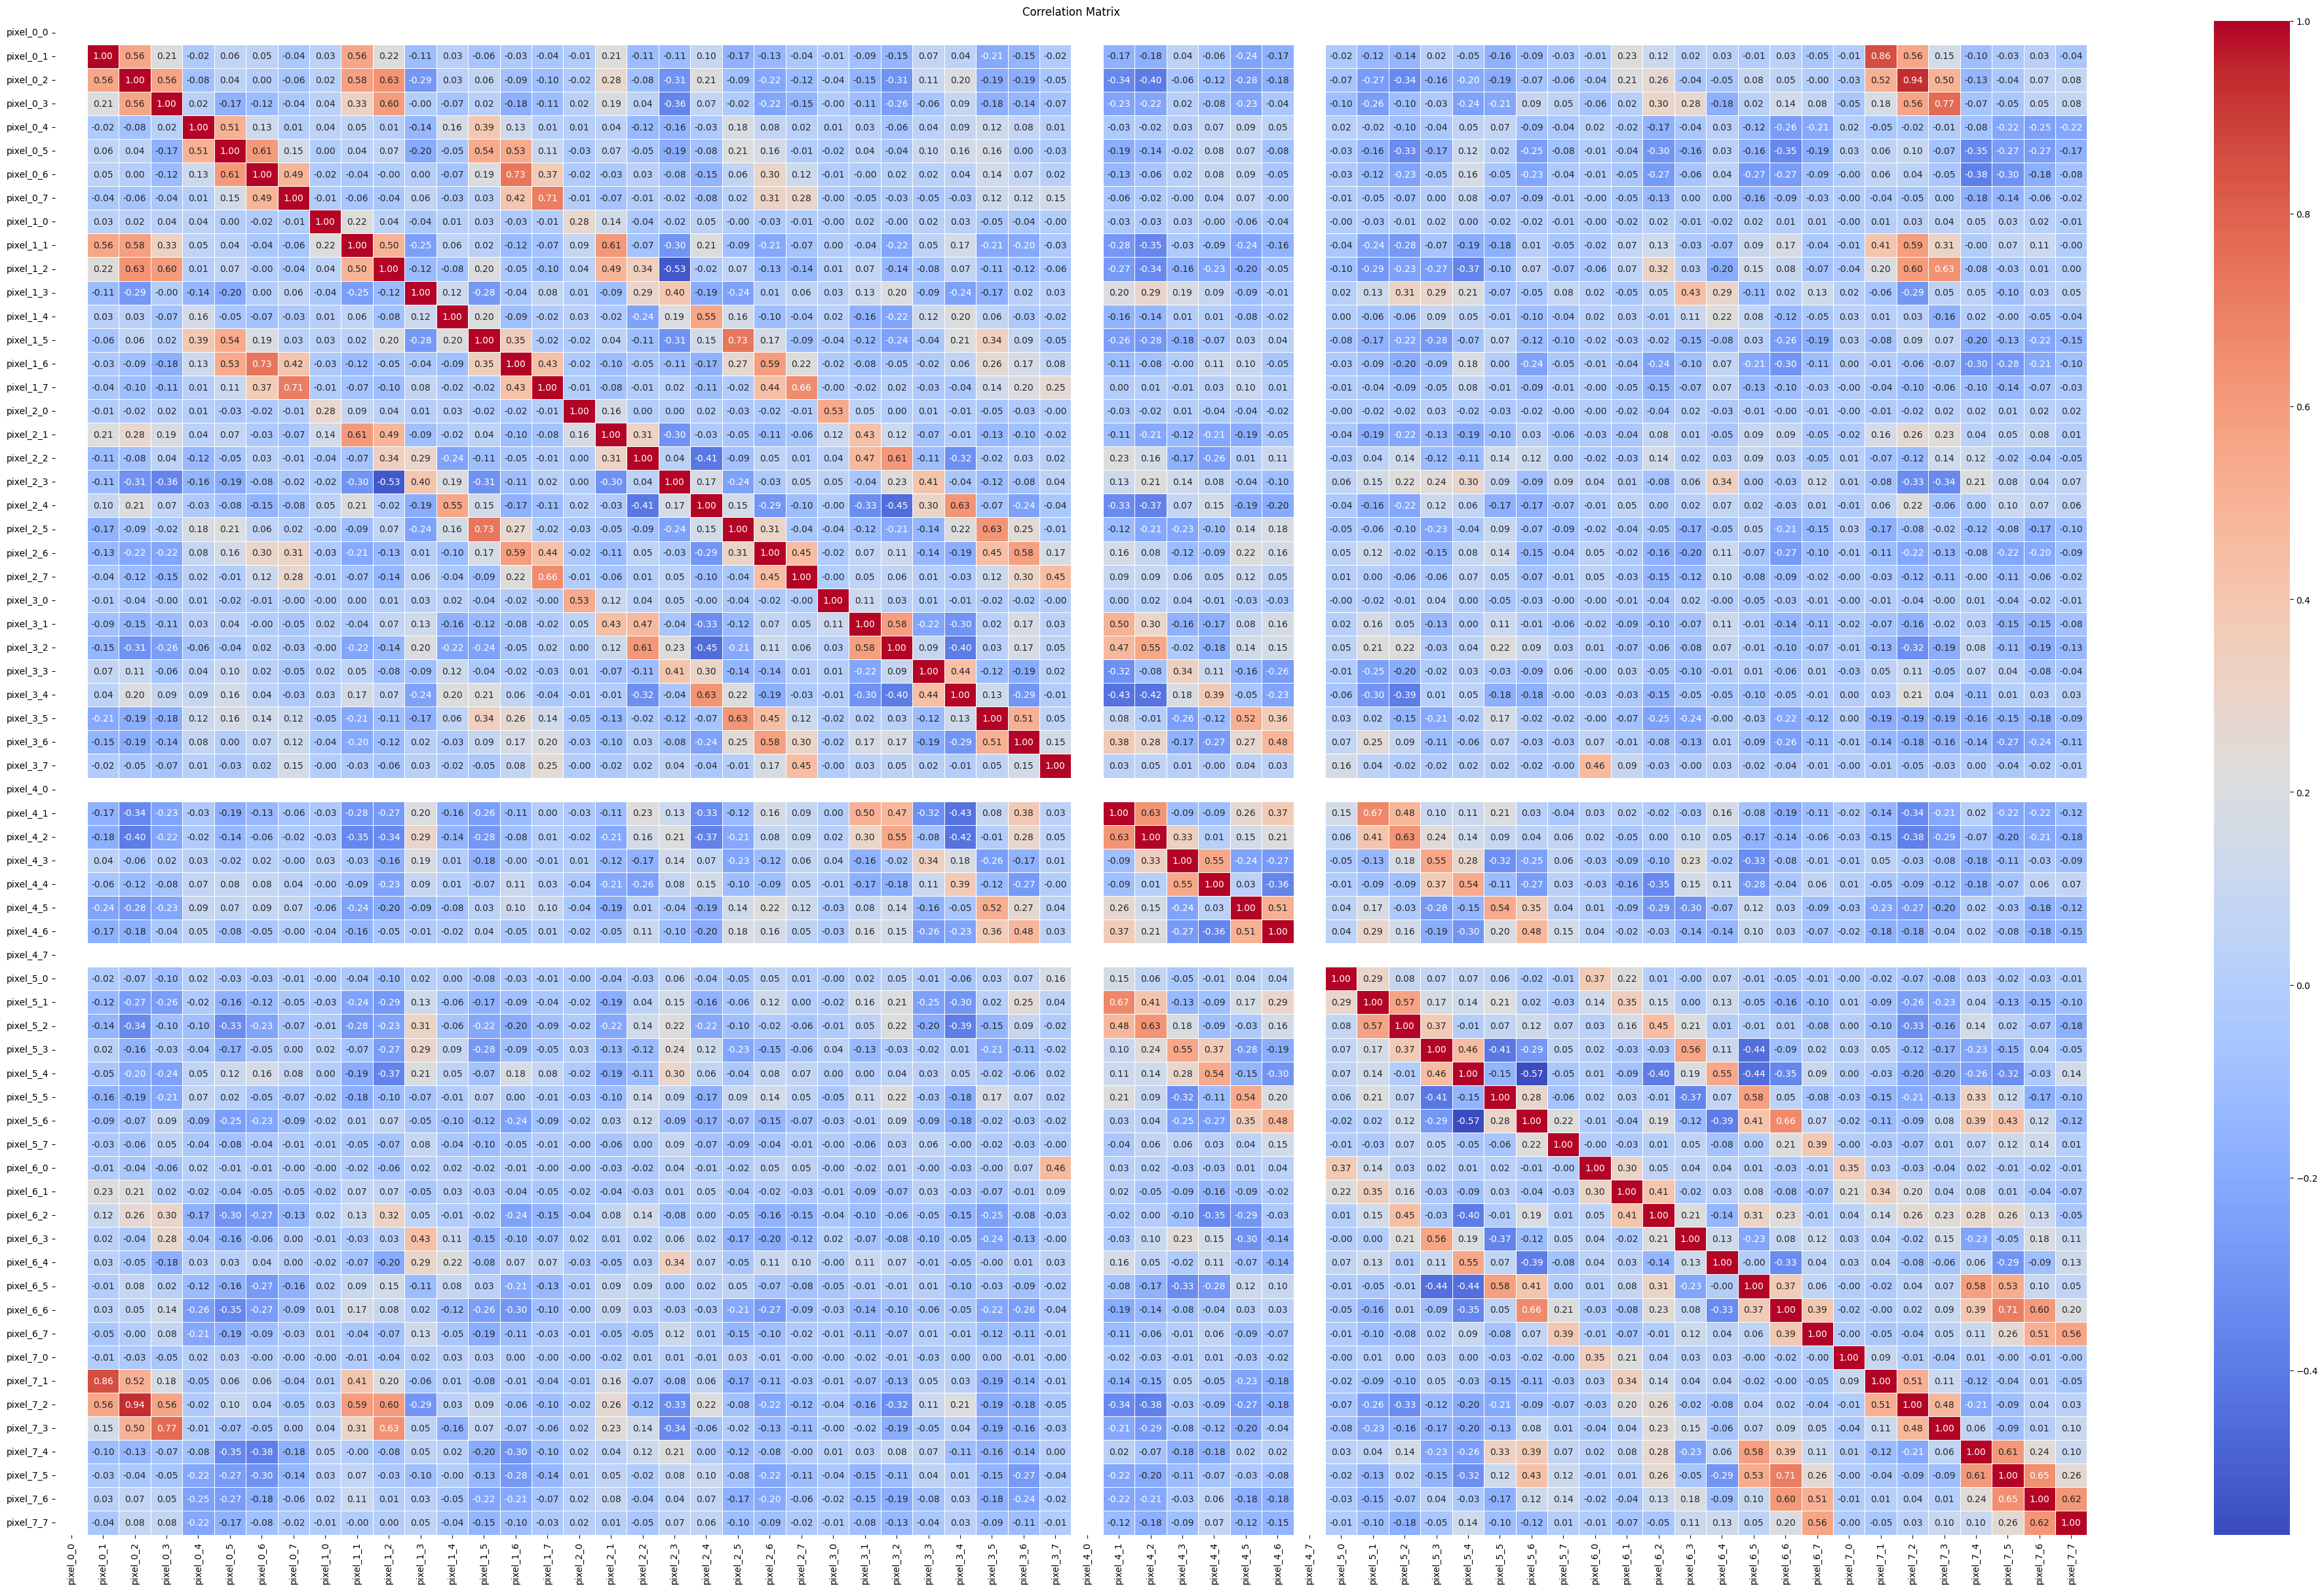

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

#Scatter Diagram
sns.pairplot(df[['pixel_3_3', 'pixel_4_6', 'pixel_3_7','pixel_7_3','pixel_1_2','pixel_3_5']])
plt.show()

#Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(50, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

***Диаграмма рассеивания:***


1.   Отсутсвие четких зависимостей.
В большинстве пар не наблюдается четких зависимостей. Так, например, между парами 3_3, 4_6 и 3_7.

2.   Склонность к кластеризации.
Некоторые переменные могут показывать признаки кластеризации, где точки сгруппированы в определенные области. Это может указывать на наличие различных классов или категорий в данных.

3.   Низкая вариативность. Так, у пикселя 7_3 наблюдается низкая вариантивность значений что указывает на то, что он соделжит достаточно онородную информацию.

***Корреляционная матрица***

Многие атрибуты имеют корреялицию в пределах от -0.2 до 0.2, что говорит об их независимости друг от друга

Однако, встречаются и такие пары, для которых характерен высокий показатель корреляции(pixel_7_2 и pixel_0_2)(0.94, что показывает нам прямую зависимость между этими 2мя параметрами).

Так же встречается и сильный показатель отрицательной корреляции, например -0.41 между pixel_5_5 и pixel_5_3, или -0.57 между pixel_5_6 и pixel_5_4

### 1.6 Выводы


*Сделать выводы по результатам предварительного визуального анализа исходных данных*

# Общие выводы:


1.   Распределение
Гистограммы показали, что пиксели имеют не симметричное распределение со смещением в сторону нуля, а некоторые пиксели имеют ограниченный диапозон
2.   Корреляция
Диаграммы рассеивания показали отсутствие зависимости между признаками, однако в некоторых парах присутствуют возможные кластеры
1.   Выбросы
Присутствует много выбросов, которые могут повлиять на некоторые модели машинного обучения





---
# 2. Предобработка данных

### 2.1 Очистка данных


*а) Обнаружение и устранение дубликатов*\
*б) Обнаружение и устранение выбросов*\
*в) Устранение/восстановление пропущенных значений*

In [181]:
#Duplicate Detection and Search
duplicates = df[df.duplicated()]
df = df.drop_duplicates()
print(f"Number of duplicates: {len(duplicates)}")

#Detection and elimination of emissions
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Number of rows after the emission is removed: {df_cleaned.shape[0]}")

#Removing and restoring missing values
missing_values = df.isnull().sum()
print(f"Number of values missed:\n{missing_values}")
df = df.dropna()
df = df.fillna(df.mean())

Number of duplicates: 0
Number of rows after the emission is removed: 489
Number of values missed:
pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64


### 2.2 Разбиение данных на обучающую и тестовую выборки


*Разбить данные на обучающую и тестовую выборки в отношении 70/30*

In [184]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_digits()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Sample size: {X_train.shape[0]} strings")
print(f"Test sample size: {X_test.shape[0]} strings")

Sample size: 1257 strings
Test sample size: 540 strings


### 2.3 Преобразование данных

*Описать используемые способы преобразования входных и выходных переменных, привести обоснования выбранных способов преобразования, применить преобразования к обучающей и тестовой выборкам*

Поскольку некоторые пиксели могут иметь более важное значение, чем другие, то с помощью нормализации мы можем уменьшить влияние отдельных пикселей.
Так же в будущем это может улучшить сходимость алгоритмов, основанных на градиентном спуске

In [185]:
from sklearn.preprocessing import StandardScaler

# initialization StandardScaler
scaler = StandardScaler()

# Conversion of the learning sample
X_train_scaled = scaler.fit_transform(X_train)

# Test sample conversion
X_test_scaled = scaler.transform(X_test)

# Output first 5 lines after scaling for checking
print("First 5 lines of the sample after scaling:")
print(X_train_scaled[:5])

First 5 lines of the sample after scaling:
[[ 0.00000000e+00 -3.51631005e-01 -4.38310963e-02  2.78851334e-01
   2.67980606e-01  4.05736403e-01 -4.00396392e-01 -1.29942863e-01
  -5.96355117e-02 -6.21944027e-01  1.04964180e+00 -2.54684710e-01
   5.42913798e-01  1.26365726e+00  1.13153644e+00 -1.36266734e-01
  -5.33790929e-02 -4.31228064e-01  1.10566367e+00 -3.72681685e-01
  -8.30531372e-01  9.84526892e-01  2.16836704e+00 -1.12194823e-01
  -3.99202392e-02 -7.59725174e-01  1.46131647e-02  1.19905678e+00
   9.96383146e-01  1.26548621e+00 -6.23175088e-01 -4.89115988e-02
   0.00000000e+00 -6.51016507e-01  3.84826298e-01  1.08656642e+00
   6.22772225e-01  9.17546004e-01 -8.09644217e-01  0.00000000e+00
  -6.97229601e-02  1.17531414e+00  1.24288721e+00 -5.28223576e-01
  -1.23930490e+00  1.36202846e+00  5.86035183e-01 -9.45277773e-02
  -3.93762334e-02  3.01608948e+00  1.13851450e+00 -5.09866348e-01
  -6.79711047e-01  1.18910480e+00  4.82864208e-02 -2.14707136e-01
  -2.82166324e-02 -3.16459718e-01

---
# 3. Построение и исследование модели машинного обучения

### 3.1 Обучение модели


*Выбрать модель и алгоритм машинного обучения для решения поставленной задачи, привести обоснование выбора, обучить модель на обучающей выборке*

Итак, поскольку у нас много данных(64 пикселя) и много классов (10 шт), а так же отсутствуют дубликаты и все переменные являются числовыми то лучшим выбором будет использовать Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 3.2 Оценка качества модели


**Для задач регрессии:**
* *построить диаграммы рассеяния в пространстве «выход модели – желаемый выход» на данных обучающей и тестовой выборок*
* *построить линейные регрессии выхода модели на желаемый выход*
* *рассчитать коэффициенты детерминации линейных регрессионных моделей для обучающей и тестовой выборок*
* *построить гистограммы распределения ошибок модели.*

**Для задач классификации:**
* *построить матрицы ошибок (confusion matrix) классификатора и рассчитать показатели качества классификации (чувствительность, специфичность, точность, F-мера, каппа Коэна) на обучающей и тестовой выборках.*

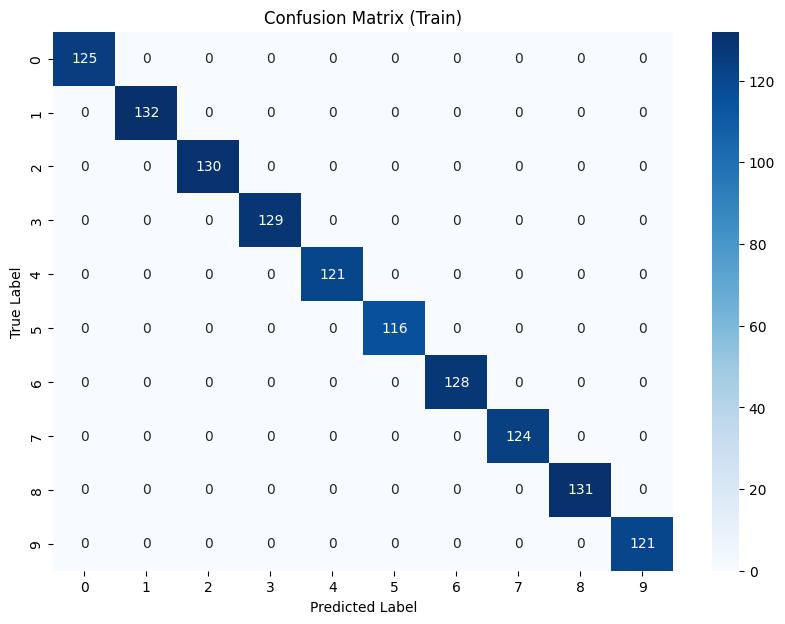


Показатели качества классификации для обучающей выборки:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       130
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       116
           6       1.00      1.00      1.00       128
           7       1.00      1.00      1.00       124
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00       121

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257



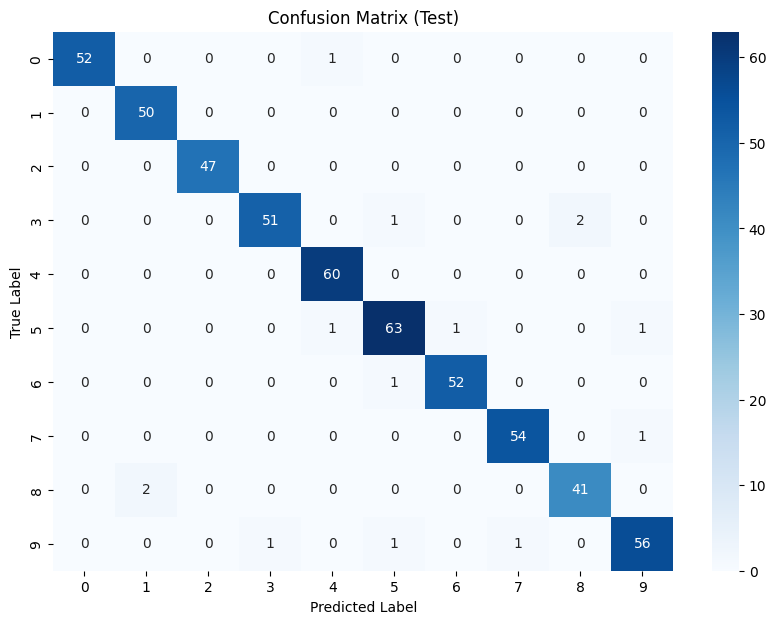


Показатели качества классификации для тестовой выборки:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.98      0.94      0.96        54
           4       0.97      1.00      0.98        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.95      0.95        43
           9       0.97      0.95      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [197]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions in a learning sample
y_train_pred = model.predict(X_train)

# Calculate confusion matrix for learning sample
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculation of classification quality indicators
report_train = classification_report(y_train, y_train_pred)
print("\nПоказатели качества классификации для обучающей выборки:")
print(report_train)

# Predictions on test sample
y_test_pred = model.predict(X_test)

# Calculate confusion matrix for test sample
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculation of classification quality indicators
report_test = classification_report(y_test, y_test_pred)
print("\nПоказатели качества классификации для тестовой выборки:")
print(report_test)


### 3.3 Исследование модели и алгоритма обучения


*Провести экспериментальные исследования модели, построить графики зависимости ошибки модели от ее архитектурных параметров и гиперпараметров алгоритма обучения, построить ROC-кривые, оценить степень важности признаков и пр.*

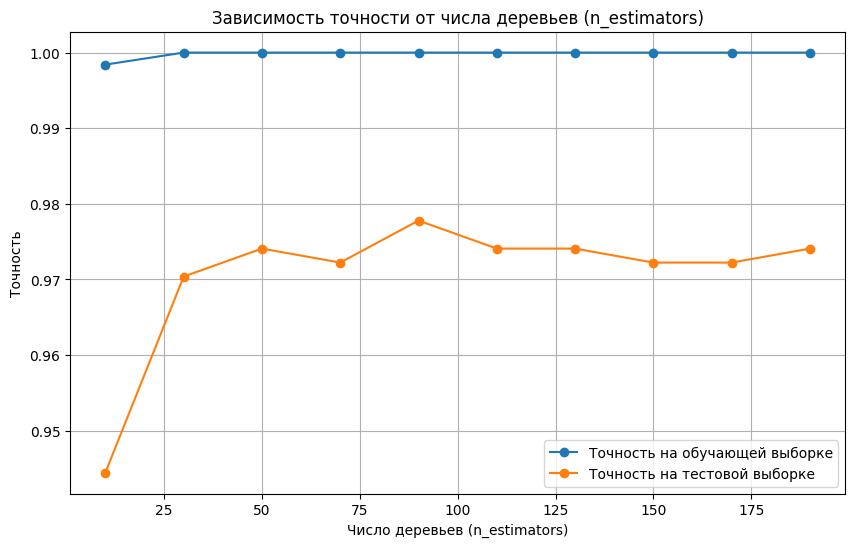

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

n_estimators_range = range(10, 210, 20)
train_accuracies = []
test_accuracies = []

for n_estimators in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Точность на обучающей выборке', marker='o')
plt.plot(n_estimators_range, test_accuracies, label='Точность на тестовой выборке', marker='o')
plt.title('Зависимость точности от числа деревьев (n_estimators)')
plt.xlabel('Число деревьев (n_estimators)')
plt.ylabel('Точность')
plt.legend()
plt.grid()
plt.show()


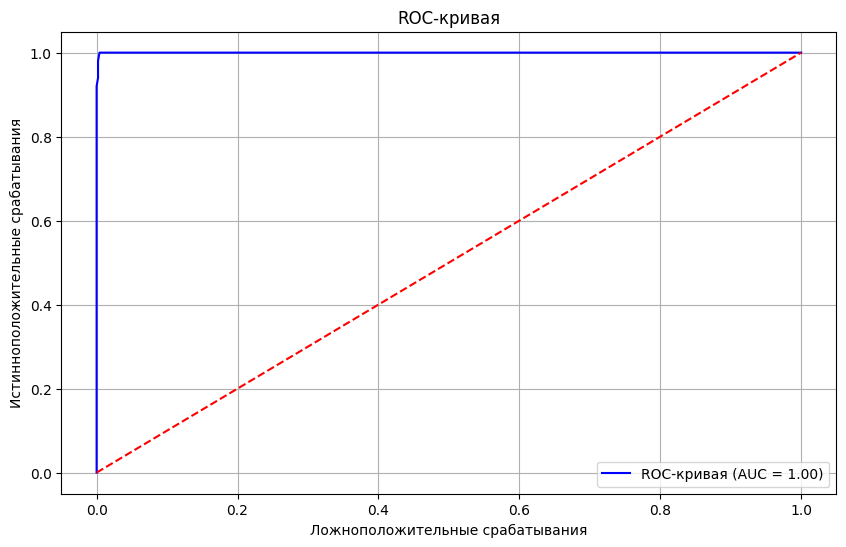

In [194]:
from sklearn.metrics import roc_curve, auc

# Get probability predictions for test sample
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

# Build ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC-кривая')
plt.xlabel('Ложноположительные срабатывания')
plt.ylabel('Истинноположительные срабатывания')
plt.legend(loc='lower right')
plt.grid()
plt.show()


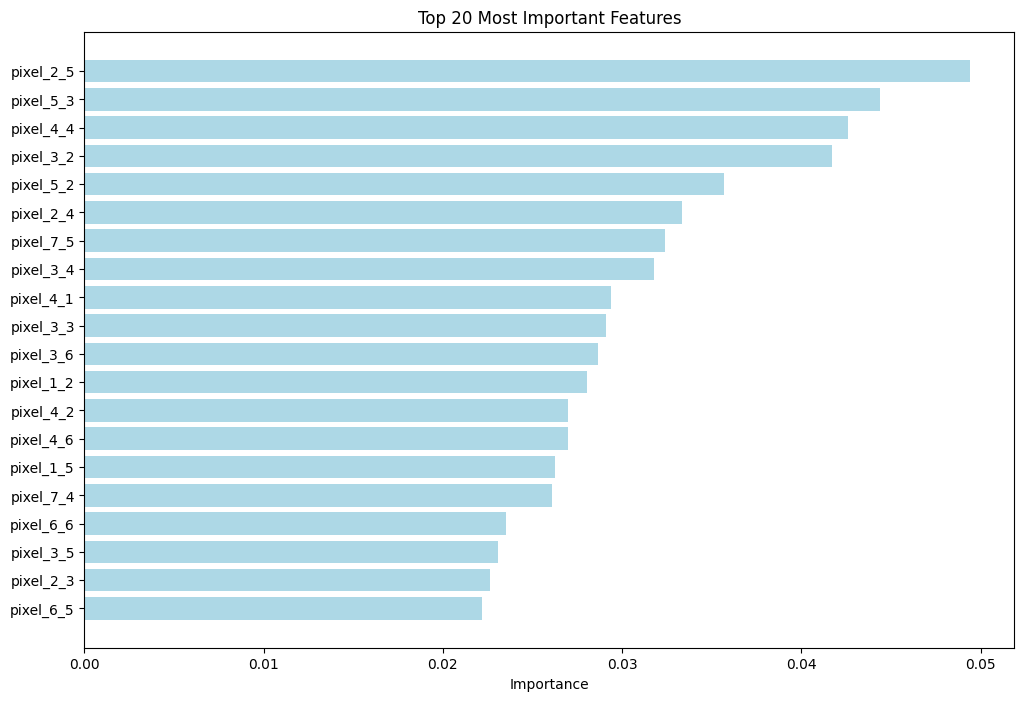

In [202]:
# Getting the importance of the features
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})

# Sort DataFrame by decreasing importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualization of the importance of the features
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='lightblue')
plt.xlabel('Importance')
plt.title('Top 20 Most Important Features')
plt.gca().invert_yaxis()
plt.show()

### 3.4 Улучшение решения


*Предложить возможное улучшение точности решения задачи (выбрать другой тип модели, алгоритм или критерий обучения, сформулировать рекомендации по возможным способам повышения точности модели), обучить модель и сравнить показатели точности с рассчитанными в п.3.2*

In [203]:
from sklearn.neural_network import MLPClassifier

# Creation and training of neural network model
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

# Model accuracy evaluation on test data
mlp_accuracy = mlp.score(X_test, y_test)
print(f"Точность модели MLP: {mlp_accuracy}")


Точность модели MLP: 0.9796296296296296


### 3.5 Выводы


**3.1 Выбор модели обучения**

После поставленных требований была выбранна модель Random Forest, как стабильный способ обучения с минимальной вероятностью переобучения и хороший инструмен с большим количеством данных и классов.

**3.2 Оценка качества модели**

Модель показала отличный результат в виде 97%, что свидетельствует о ее высокой способности различать цифры. Считаю это достойным результатом, учитывая, что на сайте максимальный показатель составляет 97.607%

**3.4 Улучшение решения**

В качестве альтернативной модели была выбрана XGBoost, которая тоже показала отличный результат в 97.9629%, что составляет даже больше, чем на сайте...

Подозреваю, что это из-за того, что данные были предварительно обработаны

**Итог**

Модель хорошо справляется в поставленной задачей классификации, достигает высокой точности с минимальными затратами по обучаемости. Считаю, что это из-за хорошего предварительного анализа и предобработки данных.


